In [ ]:
'''
=================================================
Milestone 1

Nama    : Muhammad Rozzaaq
Batch   : RMT-033
Tableau : https://public.tableau.com/app/profile/muhammad.rozzaaq/viz/Muhammad_Rozzaaq_rmt033/Story1?publish=yes

Membuat sebuah analisa pasar dengan data yang di peroleh untuk mengatasi ketidakseimbangan  profit tiap bulannya
=================================================
'''


In [163]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


Problem Statement \
Adidas mengalami permasalahan pada tigkat penjualan yang tidak merata tiap bulannya. perusahaan harus menganalisa tingkat penjualan pada tiap bulan dan mencari tahu apa saja yang mempengaruhi tingkat penjualan.

5W 1H:
- Seperti apa tingkat penjualannya. 
- pada bulan apa penjualan tertinggi
- apakah sales method berpengaruh pada tingkat penjualan?
- method apakah yang tingkat penjualannya palin tinggi? 
- perbedaan significant antara region, mana yg lebih bagus
- apakah harga berpengaruh pada tingkat penjualan


Problem Statement \
Adidas mengalami permasalahan penjualan yang tidak seimbang tiap bulannya. perusahaan harus menganalisa data penjualan tiap bulannya untuk mengetahui pada bulan apa tingkat penujalan rendah dan pada bulan apa tingkat penjualn tinggi.
Perusahaan juga melakukan analisa method penjualan mana yang terbaik. apakah in-store, outlet atau online.

Metode SMART \
a. Spesifik 
- Membuat penjulan produk tiap bulan lebih seimbang
- Mengatasi lonjakan barang terjual 
- Menentukan sales method, daerah distribusi, yang harus di lakukan pembaharuan strategi pemasaran

b. Measurable 
- menentukan bulan mana yang harus di tingkatkan penjualannya 

c. Achievable: 
Membuat analisa tentang penjualan berdasarkan data penjualan.
Menggunakan analisis data untuk menentukan strategi paling tepat untuk meningkatkan penjualan  

d. Relevant: 
meningkatkan penjualan dinulan yang penjualannya rendah.
mementaince penjualan produk di bulan yang penjualannya bagus

e. Time-bound: 
Melaksanakan strategi optimasi persediaan dalam waktu 6 bulan ke depan. 
Pengukuran dan evaluasi dilakukan setiap bulan untuk melihat kemajuan dan penyesuaian strategi yang diperlukan.

# A. Data Exploration

## A.1. Data Loading

In [134]:
df = pd.read_csv('data_adidas.csv')
df.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


Meta Data :
- Retailer          = Toko tempat Adidas mensuply barang, bertipe data kategorik
- Retailer ID       = Nomor uniq yang menunjukan identitad Retail, bertipe data numerik
- Invoice Date      = Tanggal Pemesanan, bertipe data datetime
- Region            = Kawasan yang memiliki kumpulan dari beberapa kota/negara, bertipe data kategori
- State             = Wilayah, bertipe data kategorik
- City              = Kota, bertipe data kategorik
- Product           = Berisi daftar nama produk Adidas, bertipe data kategorik
- Price per Unit    = Harga tiap barang, bertipe data numerik
- Units Sold        = Banyaknya barang yang terjual, bertipe data numerik
- Total Sales       = Total harga yang telah terjual (harga x Barang terjual), bertipe data numerik
- Operating Profit  = Keuntungan, bertipe data numerik
- Operating Margin  = Persentase keuntungan produk, bertipe data numerik
- Sales Method      = Metode penjualan (online, in-store, outlet), bertipe data kategorik

## A.2. Info Summary Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [39]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

## A.3. Data Cleaning

In [135]:
# Menghilangkan karakter pada kolom Price per Unit dan mengubahnya mnjadi numeric
df['Price per Unit'] = df['Price per Unit'].str.replace('$', '')
df['Price per Unit'] = df['Price per Unit'].str.replace('.00', '')
df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors='coerce')

# Menghilangkan karakter pada kolom Units Sold dan mengubahnya mnjadi numeric
df['Units Sold'] = df['Units Sold'].str.replace(',', '')
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce')

# Menghilangkan karakter pada kolom Total Sales dan mengubahnya mnjadi numeric
df['Total Sales'] = df['Total Sales'].str.replace('$', '')
df['Total Sales'] = df['Total Sales'].str.replace(',', '')
df['Total Sales'] = pd.to_numeric(df['Total Sales'], errors='coerce')

# Menghilangkan karakter pada kolom Operating Profit dan mengubahnya mnjadi numeric
df['Operating Profit'] = df['Operating Profit'].str.replace('$', '')
df['Operating Profit'] = df['Operating Profit'].str.replace(',', '')
df['Operating Profit'] = pd.to_numeric(df['Operating Profit'], errors='coerce')

# Menghilangkan karakter pada kolom Operating Margin dan mengubahnya mnjadi numeric
df['Operating Margin'] = df['Operating Margin'].str.replace('%', '')
df['Operating Margin'] = pd.to_numeric(df['Operating Margin'])



In [136]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

In [137]:
df.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30,In-store
5,Foot Locker,1185732,2020-01-06,Northeast,New York,New York,Women's Apparel,50,1000,500000,125000,25,In-store
6,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Street Footwear,50,1250,625000,312500,50,In-store
7,Foot Locker,1185732,2020-01-08,Northeast,New York,New York,Men's Athletic Footwear,50,900,450000,135000,30,Outlet
8,Foot Locker,1185732,2020-01-21,Northeast,New York,New York,Women's Street Footwear,40,950,380000,133000,35,Outlet
9,Foot Locker,1185732,2020-01-22,Northeast,New York,New York,Women's Athletic Footwear,45,825,371250,129938,35,Outlet


In [140]:
df.to_csv('Data_Adidas_Bersih.csv',index=False)

# B. Data Analisis

In [141]:
data = pd.read_csv('Data_Adidas_Bersih.csv')
data.head(4)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35,In-store


In [142]:
data.describe().round(2)

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648.00,9648.00,9648.00,9648.00,9648.00,9648.00
mean,1173849.72,45.22,256.93,93273.44,34425.28,42.30
std,26360.38,14.71,214.25,141916.02,54193.12,9.72
min,1128299.00,7.00,0.00,0.00,0.00,10.00
25%,1185732.00,35.00,106.00,4254.50,1922.00,35.00
50%,1185732.00,45.00,176.00,9576.00,4371.50,41.00
75%,1185732.00,55.00,350.00,150000.00,52063.00,49.00
max,1197831.00,110.00,1275.00,825000.00,390000.00,80.00


Units Sold in Average: 256.9300373134328
Median of Units Sold: 176.0
Mode of Units Sold: 225


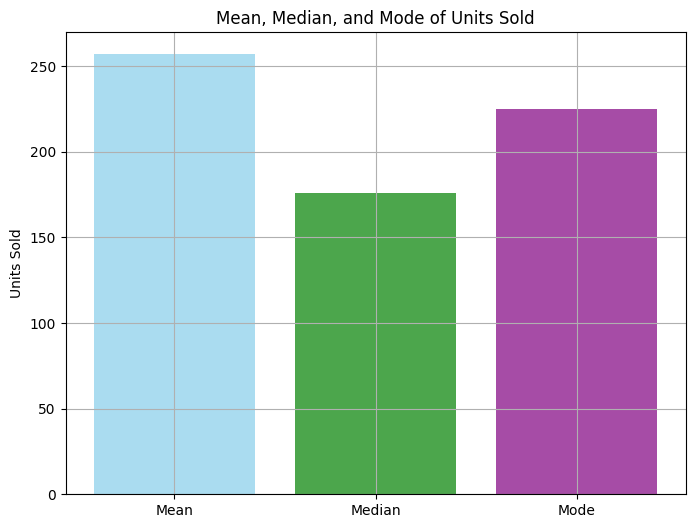

In [220]:
# Menghitung mean, median, dan modus dari kolom 'Units Sold'
mean_value = data['Units Sold'].mean()
median_value = data['Units Sold'].median()
mode_value = data['Units Sold'].mode().values[0]  # Ambil nilai modus pertama jika ada beberapa modus

# Menampilkan informasi statistik
print('Units Sold in Average:', mean_value)
print('Median of Units Sold:', median_value)
print('Mode of Units Sold:', mode_value)

# Visualisasi menggunakan bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Mean', 'Median', 'Mode'], [mean_value, median_value, mode_value], color=['skyblue', 'green', 'purple'], alpha=0.7)
plt.title('Mean, Median, and Mode of Units Sold')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

## B.1. Tingkat Penjualan Adidas 

#### Melihat grafik penjualan tiap bulan 

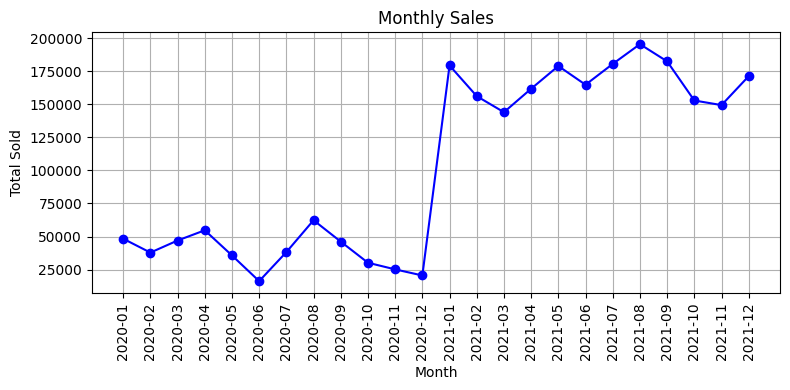

In [148]:
# Mengubah kolom 'date' menjadi tipe datetime64[ns]
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

# Mengelompokkan data berdasarkan bulan dan menghitung total penjualan per bulan
data['Month'] = data['Invoice Date'].dt.to_period('M')
monthly_sold = data.groupby('Month')['Units Sold'].sum().reset_index()

# # Mengubah kolom 'month' kembali menjadi string agar lebih mudah dibaca di grafik
monthly_sold['Month'] = monthly_sold['Month'].astype(str)

# Membuat grafik penjualan per bulan
plt.figure(figsize=(8, 4))
plt.plot(monthly_sold['Month'], monthly_sold['Units Sold'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Total Sold')
plt.title('Monthly Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, terlihat ada lonjakan penjualan produk yang cukup signifikan. Menjadi bahan untuk dianalisa lebih lanjut. Bisa menjawab pertanyaan apak strategi pemasaran yang dilakukan sudah cukup berhasil atau belum 

#### Melihat Bulan dengan penjualan tertinggi

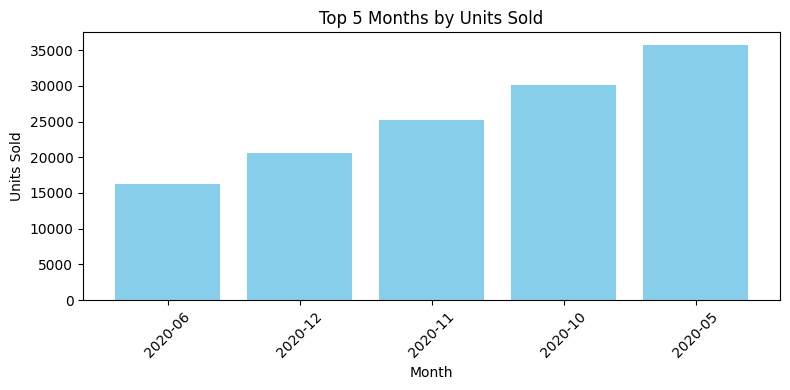

In [212]:
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
data['Month'] = data['Invoice Date'].dt.to_period('M')

# Mengelompokkan berdasarkan bulan dan menghitung total Units sold per bulan
monthly_sold = data.groupby('Month')['Units Sold'].sum().reset_index()

# Mengurutkan berdasarkan nilai sold dari yang tertinggi
sorted_monthly_sold = monthly_sold.sort_values(by='Units Sold', ascending=True)

# Ambil lima data teratas
top_5_monthly_sold = sorted_monthly_sold.head(5)

# Plot grafik batang
plt.figure(figsize=(8, 4))
plt.bar(top_5_monthly_sold['Month'].astype(str), top_5_monthly_sold['Units Sold'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Top 5 Months by Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan grafik
plt.show()

#### Hubungan sales method dengan tingkt penjualan

#### Melihat Sales_Method dengan penjualan tertinggi

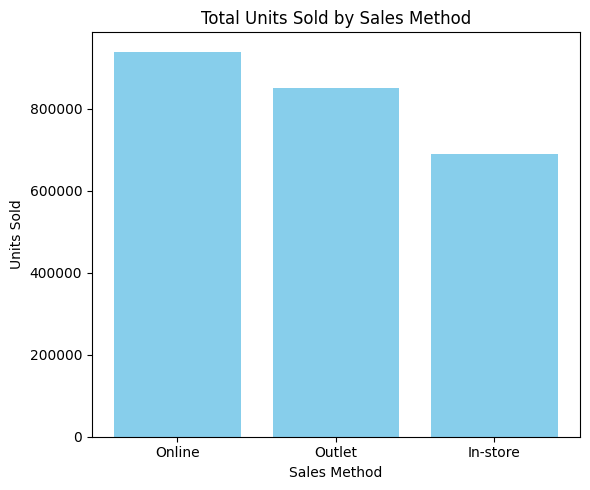

In [211]:
# Mengelompokkan berdasarkan bulan dan menghitung total sold per bulan
SalesMethod_sold = data.groupby('Sales Method')['Units Sold'].sum().reset_index()

# Mengurutkan berdasarkan nilai sold dari yang tertinggi
SalesMethod_sold = SalesMethod_sold.sort_values(by='Units Sold', ascending=False)

# Plot grafik batang
plt.figure(figsize=(6, 5))
plt.bar(SalesMethod_sold['Sales Method'], SalesMethod_sold['Units Sold'], color='skyblue')
plt.xlabel('Sales Method')
plt.ylabel('Units Sold')
plt.title('Total Units Sold by Sales Method')
plt.xticks(rotation=0)
plt.tight_layout()

Terlihat bahwa Online adalah Sales_Method dengan penjualan tertiggi

#### Melihat Product dengan penjualan tertinggi

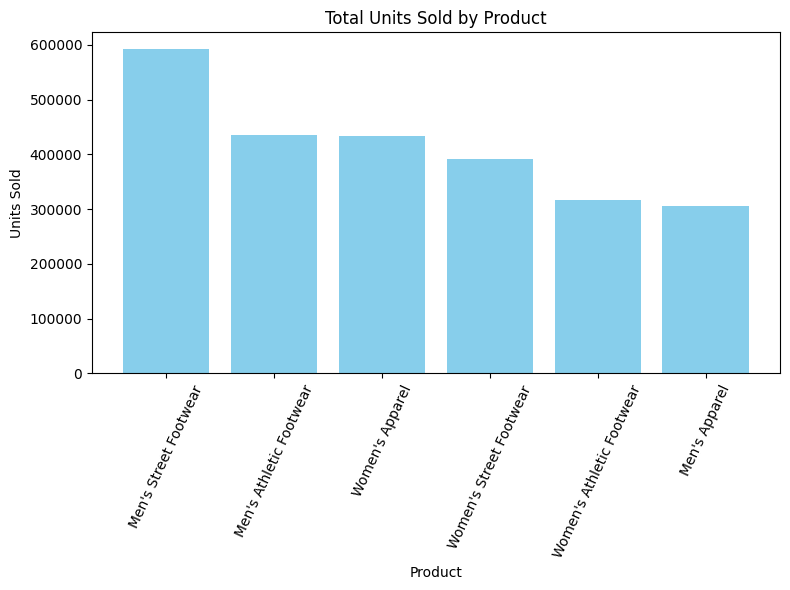

In [196]:
# Mengelompokkan berdasarkan bulan dan menghitung total sold per bulan
Product_sold = data.groupby('Product')['Units Sold'].sum().reset_index()

# Mengurutkan berdasarkan nilai sold dari yang tertinggi
Product_sold = Product_sold.sort_values(by='Units Sold', ascending=False)

# Plot grafik batang
plt.figure(figsize=(8, 6))
plt.bar(Product_sold['Product'], Product_sold['Units Sold'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.title('Total Units Sold by Product')
plt.xticks(rotation=65)
plt.tight_layout()


Terlihat bahwa Men's Street Footwear adalah product dengan penjualan tertinggi/terlaris

#### Perbandingan harga antar akhir tahun  2020 dan awal tahun 2021

In [126]:
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

# Filter data untuk bulan dan tahun tertentu (misalnya Desember 2020)
bulan_tahun = '2020-12'  # Ubah sesuai dengan bulan dan tahun yang Anda inginkan
filtered_data = data[data['Invoice Date'].dt.strftime('%Y-%m') == bulan_tahun]

# Menampilkan harga tiap barang pada bulan dan tahun tertentu
harga_barang_2020 = filtered_data[['Product', 'Price per Unit']].drop_duplicates()
harga_barang_2020 = harga_barang_2020.sort_values(by='Price per Unit', ascending=True)

harga_barang_2020


,Product,Price per Unit
4726,Women's Street Footwear,24
4727,Women's Athletic Footwear,24
839,Women's Athletic Footwear,25
838,Women's Street Footwear,25
4728,Men's Apparel,32
...,...,...
160,Women's Street Footwear,65
156,Men's Apparel,65
159,Men's Athletic Footwear,65
4051,Women's Apparel,72


In [123]:
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

# Filter data untuk bulan dan tahun tertentu (misalnya Desember 2020)
bulan_tahun = '2021-01'  # Ubah sesuai dengan bulan dan tahun yang Anda inginkan
filtered_data = data[data['Invoice Date'].dt.strftime('%Y-%m') == bulan_tahun]

# Menampilkan harga tiap barang pada bulan dan tahun tertentu
harga_barang_2021 = filtered_data[['Product', 'Price per Unit']].drop_duplicates()
# Mengurutkan berdasarkan unit harga dari yang termurah
harga_barang_2021 = harga_barang_2021.sort_values(by='Price per Unit', ascending=True)

harga_barang_2021


,Product,Price per Unit
9209,Women's Street Footwear,10
9137,Women's Street Footwear,11
9281,Women's Street Footwear,12
9138,Women's Athletic Footwear,13
5681,Women's Street Footwear,14
...,...,...
183,Men's Athletic Footwear,70
4057,Women's Apparel,72
186,Men's Apparel,75
4075,Women's Apparel,76


Bisa dilihat ada perbedaan harga pada akhir tahun 2020 dan awal tahun 2021. Untuk sementara bisa di katakan bahwa munculnya harga produkyang lebih murah menaikkan tingkat penjualan produk. Selanjutnya akan lebih dianalisa kembali tingkat profit. apakah pada bulan tersebut juga mengalami peningkatan. 

#### Grafik Profit

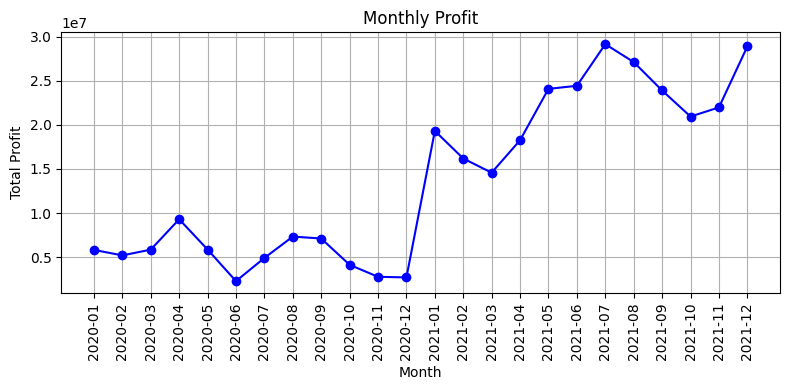

In [153]:
# Mengubah kolom 'date' menjadi tipe datetime64[ns]
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

# Mengelompokkan data berdasarkan bulan dan menghitung total penjualan per bulan
data['Month'] = data['Invoice Date'].dt.to_period('M')
monthly_profit = data.groupby('Month')['Operating Profit'].sum().reset_index()

# # Mengubah kolom 'month' kembali menjadi string agar lebih mudah dibaca di grafik
monthly_profit['Month'] = monthly_profit['Month'].astype(str)

# Membuat grafik penjualan per bulan
plt.figure(figsize=(8, 4))
plt.plot(monthly_profit['Month'], monthly_profit['Operating Profit'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.title('Monthly Profit')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, dan berkaca pada grafik sebelumnya yaitu grafik penjualan bualanan, terlihat profit dari akhir tahun 2020 ke awal tahun 2021 juga meningkat. 
Ini membuktikan strategi pemasaran dari Adidas sudah berjalan dengan baik  

#### Melihat ada tidaknya hubungan antara Harga dan Banyaknya terjual

In [154]:
# Cek kewness
print(f"Skewness: {data['Units Sold'].skew()}")
print(f"Skewness: {data['Price per Unit'].skew()}")

Skewness: 1.4622572136049727
Skewness: 0.3624454995891895


karena skewness tidak normal, maka akan dilakukan uji korelasi dengan metode spearman

rho-correlation: 0.26, p-value: 3.338296333561926e-147


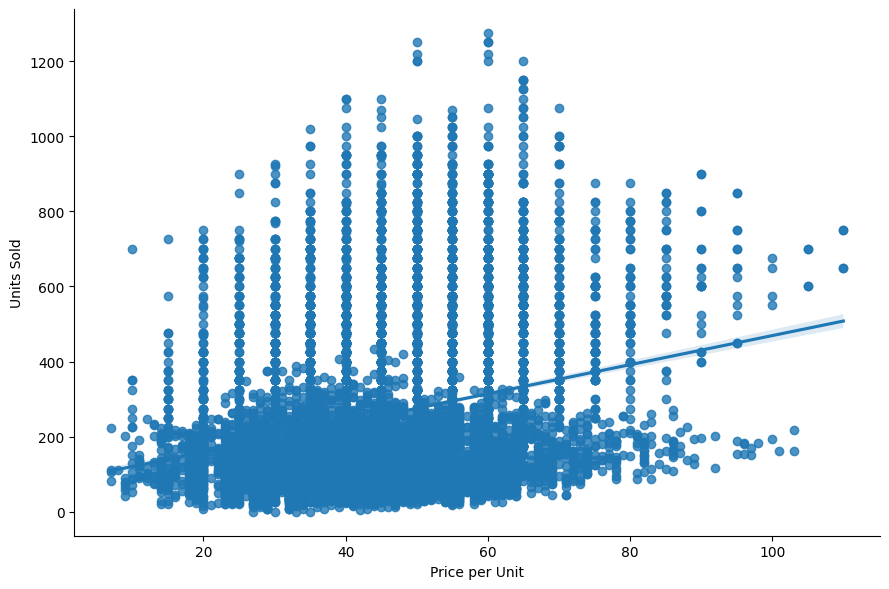

In [216]:
corr_rho, pval_s = stats.spearmanr(data['Units Sold'], data['Price per Unit'])
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
sns.lmplot(data=data,x='Price per Unit', y='Units Sold', height=6, aspect=1.5)

Hasil menunjukan adanya hubungan antara harga dan produk terjual. Hasil positif pada spearman menunjukan kedua variable berbanding lurus. Ini nyaris tidak sesuai dengan dugaan bahwa semakin murah produk, maka penjualan aka semakin banyak. Namun itu mungkin saja terjadi karna produk yang murah tidak terjual, tpi memancing konsumen untuk berkunjung di store online dan ofline Adidas yang pada ternyata membeli barang dengan harga tinggi. 

#### Perbedaan unit sold tiap region

In [176]:
# Konversi kolom 'tanggal_transaksi' ke format datetime
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

# Menambahkan kolom 'bulan' berdasarkan tanggal transaksi
data['Month'] = data['Invoice Date'].dt.month

# Menghitung rata-rata penjualan berdasarkan region dan bulan
rata_rata_penjualan = data.groupby(['Region'])['Units Sold'].mean().reset_index()

# Mengurutkan dari yang tertinggi berdasarkan rata-rata penjualan
rata_rata_penjualan_sorted = rata_rata_penjualan.sort_values(by='Units Sold', ascending=False)
rata_rata_penjualan_sorted


,Region,Units Sold
3,Southeast,332.516340
2,South,284.872685
4,West,280.631127
1,Northeast,210.976010
0,Midwest,209.047543


Terlihat Region Southeast memiliki total penjualan terbanyak. Dari data diata, kita dapat melakukan tindakan  yang tepat. Seperti dengan menempatkan fokus promosi pada region yang memiliki total penjualan terendah dan me maintence region dengan total penjualan tertinggi.
 

#### Apakah ada hubungan antara sales method dan tingkat penjualan


In [214]:
corr_tau, pval_k = stats.kendalltau(df['Sales Method'], df['Units Sold'])
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")


tau-correlation: -0.09, p-value: 9.892396237424902e-30


Nilai kendalltau menunjukan -0.09. yang berarti ada hubungan negatif antara sales method dan P-value menunjukan nilai 9.892396237424902e-30 yang berarti < 0.05 tapi >-0.05. ini menunjukan bahwa hubungan itu terjadi bukan karena kebetulan

# C. Kesimpulan

Grafik menunjukan lonjakan penjualan yang ckup signifikan di awal thun 2021. Setelah dilakukan alasia, ditemukan bahwa munculnya produk dengan harga lebih murah. Selanjutnya dilakukan analisa terhadap profit tiap bulan dengan tujuan mengetahui apakah munculnya produk dengan harg murah berpengaruh terhadap profit. Teryata didapkan hasil dimana profit juga ikut meningkat. Ini membuktikan strategi pasar Adidas berjalan dengan sangat baik.\
Analisa diatas juga mendapati produk mana yang aling laku dan paling sedikit laku. data ini bisa di gunakan oleh Adidas untuk mempertimbangkan promo promo pada produk yang kurang laku.
Kemudian lebih lanjut dilakukan pengecekan untuk mengetahui bulan yang untuk mengaplikasikan strategi pemasaran yang lebih baik di bulan tersebut. \
Dilakukan analisa pada region. Daerah mana yan gpenjualannya paling rendah. Sama seperti perlakuan pada bulan yang sepi, region dengan penjualan paling rendah akan di lakukan strategi pemasaran yang lebih baik.\
DIitemukan juga sales method paling bagus, yaitu Online. Dengan data ini, Adidas dapat memaksimalkan pejualan Online dan pengiklanan Online. dan tentu saja memperbaiki strategi pemasaran pada method In-Store 
 